# SI Model with constant-population demographics

Building up from the SI model without demography, we next explore the addition of basic demographics - adding a birth rate & an equivalent, age-independent mortality rate $\mu$ to keep constant total population.  The disease model remains the SI model.

$$
\dot{S} = -\frac{\beta*S*I}{N} + \mu N - \mu S\\

\dot{I} = \frac{\beta*S*I}{N} - \mu I
$$

With a bit of manipulation as in the previous example, this can be worked back into the form of a logistic growth differential equation
$$ \dot{I} = \beta I (N(1-\frac{\mu}{\beta})-I)$$

With solution 
$$
\frac{Nx}{1+(\frac{Nx}{I_0}-1)e^{-\beta x t}} \\
x = (1-\frac{\mu}{\beta})
$$


This notebook tests the implementation and behavior of the model as follows:
### Contruct the model
In the first few cells, we do all the necessary imports.  Then we construct a single-patch LASER model with three components: `Susceptibility`, `Transmission`, and `Births_ConstantPop`.  Finally, we initialize with a single infection and run.  The `Susceptibility` and `Transmission` components are described in the the model with no births.  `Births_ConstantPop` strictly enforces constant population - rather than having separate, random birth and death process, births are implemented by randomly choosing an existing agent and re-initializing them as a newborn.  Births are drawn from a Poisson distribution with rate determined by parameter `cbr` (in units of births per 1000 population per year). 


### Sanity check
The first test ensures certain basic constraints are being obeyed by the model.  We confirm that at each timestep, $S_t=N_t-I_t$.  We also confirm that $I_t = I_0 + \sum_{t'=0}^t \Delta I_{t'}$  

### Scientific test
Finally, we come to the scientific test.  As before, we select a few values of $\beta$, run the model, fit the outputs to the logistic equation, and compare the fitted value of $\beta$ to the known value.  Because we are approximating continuously compounding growth, in the logistic equation, with a discrete time-step approximation, we expect the fitted values of $\beta$ to be biased slightly downward - that is, the modeled trajectory is slightly slower than the continuous-time counterpart.  This error grows as $\beta$ gets larger; the test fails if any of the fitted $\beta$ values are more than 5% away from the known values.  Furthermore, if the outbreak is seeded by only one infection, it is possible that that one infection dies prior to infecting anyone else; we therefore seed with a few infections rather than one.



In [9]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from laser_core.propertyset import PropertySet

from laser_generic import Births_ConstantPop
from laser_generic import Model
from laser_generic import Susceptibility
from laser_generic import Transmission
from laser_generic.utils import seed_infections_randomly_SI

f"{np.__version__=}"

"np.__version__='1.26.4'"

In [10]:
scenario = pd.DataFrame(data=[["homenode", 1e6, "47°36′35″N 122°19′59″W"]], columns=["name", "population", "location"])
parameters = PropertySet({"seed": 2, "nticks": 730, "verbose": True, "beta": 0.04, "cbr": 400})
model = Model(scenario, parameters)
model.components = [Births_ConstantPop, 
                    Susceptibility, 
                    Transmission]
seed_infections_randomly_SI(model, ninfections=1)
model.run()

2024-12-20 23:09:40.771402: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-20 23:09:40.788500: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:01<00:00, 640.46it/s]

Completed the generic model at 2024-12-20 23:09:41.930821…
Model             :         3,209 µs
Births_ConstantPop:       117,229 µs
Susceptibility    :        35,598 µs
Transmission      :       972,438 µs
Total:                  1,128,474 microseconds


2024-12-20 20:44:09.496915: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:01<00:00, 483.69it/s]

Completed the generic model at 2024-12-20 20:44:11.030739…
Model             :         3,364 µs
Births_ConstantPop:       209,135 µs
Susceptibility    :        34,701 µs
Transmission      :     1,248,259 µs
Total:                  1,495,459 microseconds


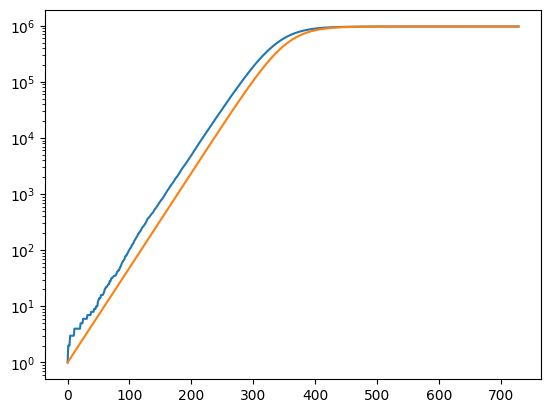

In [11]:
import matplotlib.pyplot as plt

plt.plot(model.patches.cases)
x = 1 - parameters["cbr"] / 365 / 1000 / parameters["beta"]
plt.plot(1e6 * x / (1 + (1e6 * x - 1) * np.exp(-parameters["beta"] * x * (np.arange(730)))))
plt.yscale("log")

2024-12-20 23:10:42.707001: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-20 23:10:42.709940: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:00<00:00, 2328.89it/s]

Completed the generic model at 2024-12-20 23:10:43.024945…
Model             :         1,597 µs
Births_ConstantPop:        48,603 µs
Susceptibility    :         7,118 µs
Transmission      :       251,407 µs
Total:                    308,725 microseconds
2024-12-20 23:10:43.028141: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-20 23:10:43.029909: Running the generic model for 730 ticks…



/var/folders/1b/yq6gx3hj51jf_v98kwv057xh0000gn/T/ipykernel_70228/4279173891.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  output = pd.concat(
100%|██████████| 730/730 [00:00<00:00, 1933.19it/s]

Completed the generic model at 2024-12-20 23:10:43.408630…
Model             :         1,655 µs
Births_ConstantPop:        61,626 µs
Susceptibility    :         7,468 µs
Transmission      :       301,461 µs
Total:                    372,210 microseconds
2024-12-20 23:10:43.411517: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-20 23:10:43.413208: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 3531.91it/s]

Completed the generic model at 2024-12-20 23:10:43.620864…
Model             :         1,394 µs
Births_ConstantPop:        41,165 µs
Susceptibility    :         6,733 µs
Transmission      :       153,135 µs
Total:                    202,427 microseconds
2024-12-20 23:10:43.623583: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-20 23:10:43.625066: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2974.50it/s]

Completed the generic model at 2024-12-20 23:10:43.871841…
Model             :         1,689 µs
Births_ConstantPop:        54,089 µs
Susceptibility    :         7,689 µs
Transmission      :       176,606 µs
Total:                    240,073 microseconds
2024-12-20 23:10:43.875046: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-20 23:10:43.877264: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 2503.49it/s]

Completed the generic model at 2024-12-20 23:10:44.170124…
Model             :         1,561 µs
Births_ConstantPop:        75,092 µs
Susceptibility    :         7,066 µs
Transmission      :       203,358 µs
Total:                    287,077 microseconds
2024-12-20 23:10:44.172777: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-20 23:10:44.175067: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 1856.23it/s]

Completed the generic model at 2024-12-20 23:10:44.569661…
Model             :         1,760 µs
Births_ConstantPop:        82,035 µs
Susceptibility    :         7,078 µs
Transmission      :       297,091 µs
Total:                    387,964 microseconds
2024-12-20 23:10:44.572753: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-20 23:10:44.574815: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 4126.91it/s]

Completed the generic model at 2024-12-20 23:10:44.753005…
Model             :         1,396 µs
Births_ConstantPop:        37,939 µs
Susceptibility    :         6,801 µs
Transmission      :       127,039 µs
Total:                    173,175 microseconds
2024-12-20 23:10:44.756687: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-20 23:10:44.758392: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 4403.41it/s]

Completed the generic model at 2024-12-20 23:10:44.925497…
Model             :         1,385 µs
Births_ConstantPop:        37,783 µs
Susceptibility    :         6,467 µs
Transmission      :       116,372 µs
Total:                    162,007 microseconds
2024-12-20 23:10:44.928928: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-20 23:10:44.931103: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 5241.84it/s]

Completed the generic model at 2024-12-20 23:10:45.071709…
Model             :         1,135 µs
Births_ConstantPop:        31,491 µs
Susceptibility    :         6,221 µs
Transmission      :        96,839 µs
Total:                    135,686 microseconds
2024-12-20 23:10:45.075085: Creating the generic model…
Initializing the generic model with 1 patches…
2024-12-20 23:10:45.077111: Running the generic model for 730 ticks…



100%|██████████| 730/730 [00:00<00:00, 4268.14it/s]

Completed the generic model at 2024-12-20 23:10:45.249367…
Model             :         1,417 µs
Births_ConstantPop:        41,253 µs
Susceptibility    :         6,797 µs
Transmission      :       117,681 µs
Total:                    167,148 microseconds


(-200.0, 200.0)

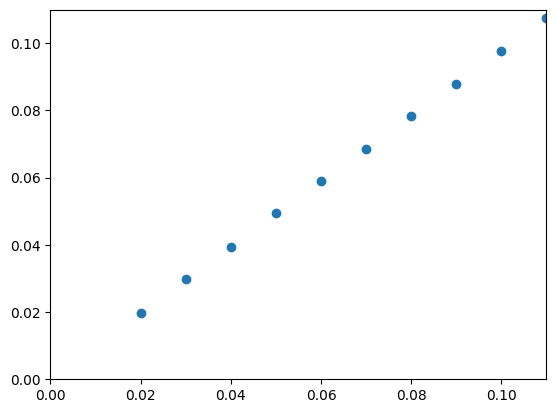

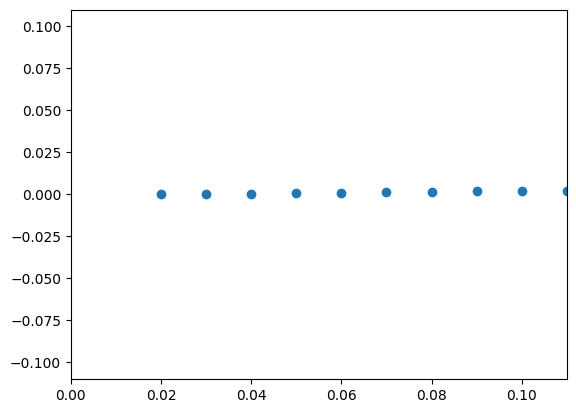

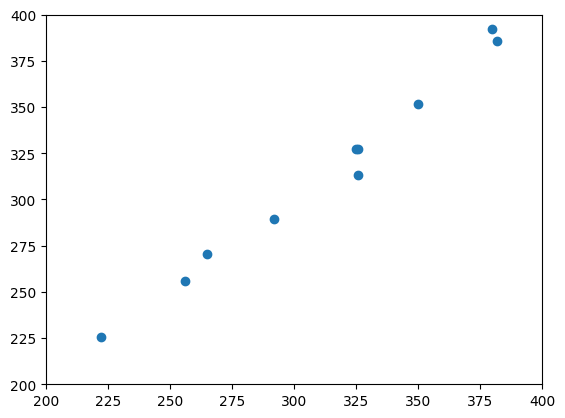

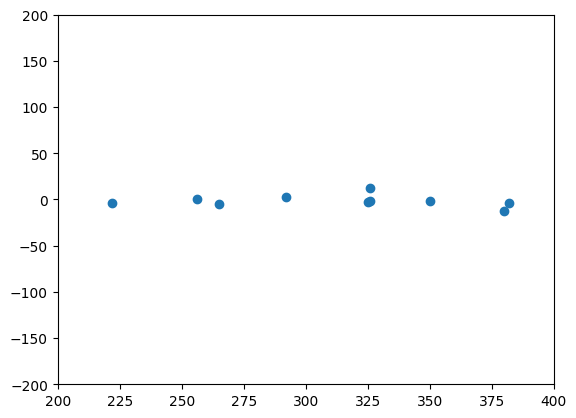

In [16]:
# Need to rethink this - the fit is degenerate in size, mu, beta all together, so fix population size for now.
# Better solution is to use functools partial, keep size as a parameter, and then fix it later using the actual scenario population.
# But this is a quick test, meant to inform a better approach by somebody down the line to formalize it.
def SI_logistic(t, beta, cbr, t0):
    x = 1 - (cbr / 365 / 1000 / beta)
    return 1e5 * x / (1 + (1e5 * x - 1) * np.exp(-beta * x * (t - t0)))


nticks = 730
t = np.arange(730)

seeds = [i for i in range(10)]
betas = [.01+0.01 * i for i in range(1, 11)]
cbrs = np.random.randint(200, 400, 10)
output = pd.DataFrame(columns=["seed", "beta", "cbr", "cases", "fitted_beta", "fitted_size", "fitted_t0"])
scenario = pd.DataFrame(data=[["homenode", 1e5, "47°36′35″N 122°19′59″W"]], columns=["name", "population", "location"])

for seed, beta, cbr in zip(seeds, betas, cbrs):
    parameters = PropertySet({"seed": seed, "nticks": nticks, "verbose": True, "beta": beta, "cbr": cbr})
    model = Model(scenario, parameters)
    model.components = [
        Births_ConstantPop,
        Susceptibility,
        Transmission,
    ]
    seed_infections_randomly_SI(model, ninfections=3)
    model.run()
    cases = [model.patches.cases[i][0] for i in range(nticks)]
    try:
        popt, pcov = curve_fit(SI_logistic, t, cases, p0=[0.05, 200, 1])
    except:
        popt = [0, 0, 0, 0]
    output = pd.concat(
        [
            output,
            pd.DataFrame.from_dict(
                {
                    "seed": seed,
                    "beta": beta,
                    "cbr": cbr,
                    "cases": [np.array(cases)],
                    "fitted_beta": popt[0],
                    "fitted_cbr": popt[1],
                    "fitted_t0": popt[2],
                }
            ),
        ],
        ignore_index=True,
    )

plt.figure()
plt.plot(output["beta"], output["fitted_beta"], "o")
plt.xlim(0, 0.12)
plt.ylim(0, 0.12)
plt.figure()
plt.plot(output["beta"], output["beta"] - output["fitted_beta"], "o")
plt.xlim(0, 0.12)
plt.ylim(-0.12, 0.12)
plt.figure()
plt.plot(output["cbr"], output["fitted_cbr"], "o")
plt.xlim(200, 400)
plt.ylim(200, 400)
plt.figure()
plt.plot(output["cbr"], output["cbr"] - output["fitted_cbr"], "o")
plt.xlim(200, 400)
plt.ylim(-200, 200)

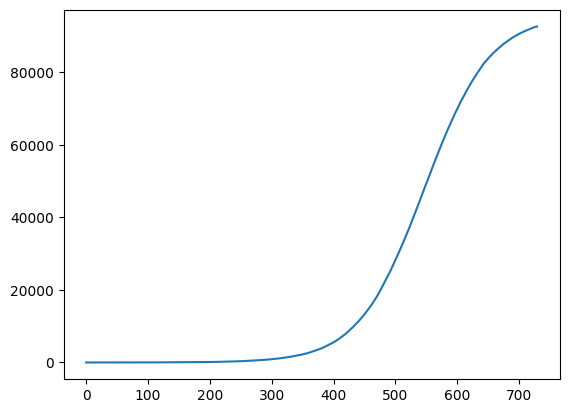

In [17]:
plt.plot(output["cases"].iloc[0])

In [18]:
output

,seed,beta,cbr,cases,fitted_beta,fitted_size,fitted_t0,fitted_cbr
0,0,0.02,326,"[3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, ...",0.019718,NaN,-61.577044,313.420957
1,1,0.03,292,"[3, 3, 3, 3, 3, 3, 3, 3, 5, 6, 6, 6, 6, 6, 6, ...",0.029898,NaN,-23.990053,289.430527
2,2,0.04,326,"[3, 3, 3, 3, 3, 3, 4, 4, 6, 7, 7, 7, 7, 8, 8, ...",0.039488,NaN,-33.516634,327.434418
3,3,0.05,382,"[3, 3, 3, 3, 3, 3, 4, 4, 6, 7, 7, 7, 7, 8, 8, ...",0.049361,NaN,-25.060509,386.009948
4,4,0.06,256,"[3, 4, 4, 4, 5, 5, 6, 6, 8, 9, 9, 9, 9, 10, 11...",0.058961,NaN,-29.525441,255.646815
5,5,0.07,350,"[3, 4, 4, 4, 5, 6, 6, 6, 8, 9, 9, 9, 9, 10, 10...",0.068590,NaN,-20.057874,351.881324
6,6,0.08,325,"[3, 4, 4, 6, 7, 8, 8, 10, 14, 14, 14, 15, 15, ...",0.078310,NaN,-21.917598,327.355421
7,7,0.09,265,"[3, 4, 4, 6, 7, 8, 8, 10, 14, 15, 15, 16, 16, ...",0.087955,NaN,-19.092737,270.306593
8,8,0.10,222,"[3, 4, 4, 5, 6, 7, 7, 10, 12, 13, 13, 14, 14, ...",0.097737,NaN,-15.072424,225.359950
9,9,0.11,380,"[3, 4, 4, 5, 6, 7, 7, 10, 12, 13, 13, 14, 14, ...",0.107669,NaN,-11.919774,392.334877


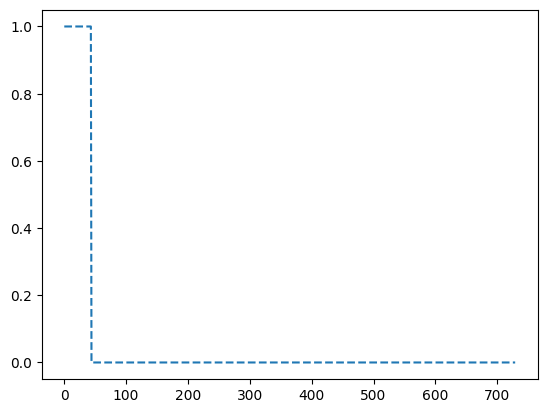

In [18]:
plt.plot(t, output["cases"].iloc[1], "--")

In [3]:
np.random.randint(100, 400, 10)

array([268, 115, 172, 122, 399, 175, 363, 262, 195, 175])

In [9]:
parameters["cbr"]

400